# Support Vector Machine

In [41]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm

# 그래프 Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mpl.rc('font',family= font_name)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Decision tree

from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor

#그래디언트 부스팅
from sklearn.ensemble import GradientBoostingRegressor

#서포트 벡터 머신

# 정규분포 및 회귀분석 등
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

#스케일링
from sklearn.preprocessing import scale, minmax_scale, robust_scale
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#선형 회귀모형
from sklearn.linear_model import LinearRegression
#변수선택법 (후진제거법)
from sklearn.feature_selection import RFE
#스케일 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

In [2]:
df_raw = pd.read_csv("/home/pirl/Statistics/Day3_0715/DIABETES.csv", engine = "python", encoding="CP949")
df_raw.shape

(442, 11)

In [4]:
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [10]:
reg_model = smf.ols(formula = "Y ~ C(GENDER)+BMI+BP+CHOLESTEROL+LDL+LTG", data=df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     76.95
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           3.01e-65
Time:                        10:24:45   Log-Likelihood:                -2387.3
No. Observations:                 442   AIC:                             4789.
Df Residuals:                     435   BIC:                             4817.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -335.3576     25.323    -13.

In [40]:
df_raw_y = df_raw['Y']
df_raw_x = df_raw.drop(["Y",'AGE','HDL','TCH','GLUCOSE'], axis = 1, inplace = False)

df_raw_test = pd.get_dummies(df_raw['GENDER'])

In [18]:
df_raw_x.head()

,GENDER,BMI,BP,CHOLESTEROL,LDL,LTG
0,2,32.1,101.0,157,93.2,4.8598
1,1,21.6,87.0,183,103.2,3.8918
2,2,30.5,93.0,156,93.6,4.6728
3,1,25.3,84.0,198,131.4,4.8903
4,1,23.0,101.0,192,125.4,4.2905


In [17]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                                test_size = 0.3, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (309, 6)
train data Y size : (309,)
test data X size : (133, 6)
test data Y size : (133,)


In [19]:
gb_uncustomized = GradientBoostingRegressor(random_state=42)
gb_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.852
Score on test set : 0.371


In [20]:
train_score = []; test_score = []

para_n_tree = [n_tree * 10 for n_tree in range (1,11)]

for v_n_estimators in para_n_tree :
    gb = GradientBoostingRegressor(random_state = 1234
                                   ,n_estimators=v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score


df_score_n["D"] = df_score_n["TrainScore"]-df_score_n["TestScore"]

df_score_n.round(3)

,n_estimators,TrainScore,TestScore,D
0,10,0.497,0.418,0.080
1,20,0.632,0.466,0.165
2,30,0.688,0.458,0.231
3,40,0.733,0.432,0.300
4,50,0.759,0.419,0.340
5,60,0.781,0.407,0.374
6,70,0.806,0.389,0.417
7,80,0.822,0.377,0.445
8,90,0.838,0.375,0.463
9,100,0.852,0.371,0.480


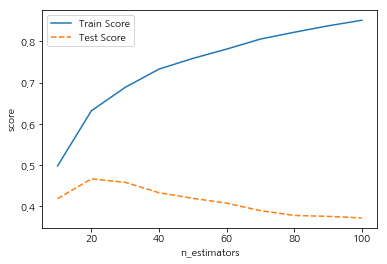

In [21]:
plt.plot(para_n_tree, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle = '--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [24]:
train_score = []; test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range (1,101)]

for v_min_samples_leaf in para_leaf :
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 20,
                                   min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["MinSamplesLeaf"] = para_leaf
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score


df_score_n["D"] = df_score_n["TrainScore"]-df_score_n["TestScore"]

df_score_n.round(3)

,MinSamplesLeaf,TrainScore,TestScore,D
0,1,0.632,0.466,0.165
1,2,0.631,0.473,0.158
2,3,0.619,0.485,0.134
3,4,0.618,0.485,0.133
4,5,0.617,0.474,0.143
5,6,0.612,0.473,0.139
6,7,0.612,0.475,0.137
7,8,0.609,0.470,0.139
8,9,0.596,0.479,0.117
9,10,0.603,0.475,0.128


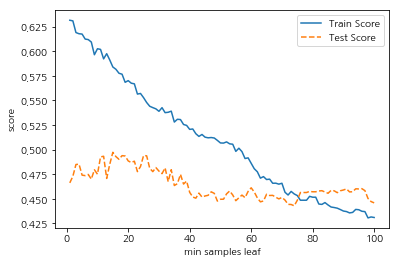

In [26]:
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [27]:
train_score = []; test_score = []

para_split = [n_split * 2 for n_split in range(30, 101)]

for v_min_samples_split in para_split :
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 20, min_samples_leaf=15,
                                    min_samples_split = v_min_samples_split)
    gb.fit (df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSampleSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score


df_score_split["D"] = df_score_split["TrainScore"]-df_score_split["TestScore"]

df_score_split.round(3)

,MinSampleSplit,TrainScore,TestScore,D
0,60,0.562,0.491,0.070
1,62,0.562,0.491,0.070
2,64,0.562,0.491,0.070
3,66,0.561,0.484,0.076
4,68,0.560,0.489,0.071
5,70,0.560,0.489,0.071
6,72,0.560,0.489,0.071
7,74,0.563,0.494,0.069
8,76,0.555,0.496,0.058
9,78,0.556,0.497,0.059


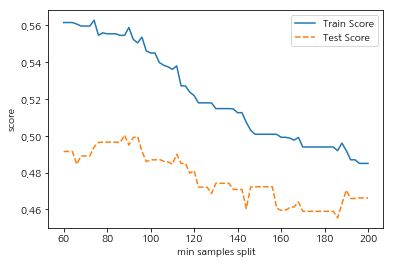

In [28]:
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

In [30]:
train_score = []; test_score = []

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth :
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 20, min_samples_leaf=15, min_samples_split =88,
                                    max_depth = v_max_depth)
    gb.fit (df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score


df_score_depth["D"] = df_score_depth["TrainScore"]-df_score_depth["TestScore"]

df_score_depth.round(3)

,Depth,TrainScore,TestScore,D
0,1,0.430,0.443,-0.014
1,2,0.521,0.487,0.035
2,3,0.555,0.500,0.054
3,4,0.558,0.493,0.065
4,5,0.563,0.490,0.074
5,6,0.566,0.492,0.074
6,7,0.566,0.492,0.074
7,8,0.566,0.492,0.074
8,9,0.566,0.492,0.074
9,10,0.566,0.492,0.074


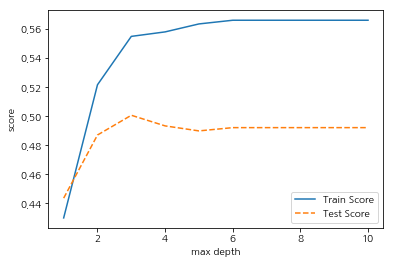

In [31]:
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

In [32]:
train_score = []; test_score = []

para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr :
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 20, min_samples_leaf=15, min_samples_split =88,
                                   max_depth =3, learning_rate = v_learning_rate)
    gb.fit (df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_lr = pd.DataFrame()
df_score_lr["Learning Rate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score


df_score_lr["D"] = df_score_lr["TrainScore"]-df_score_lr["TestScore"]

df_score_lr.round(3)

,Learning Rate,TrainScore,TestScore,D
0,0.1,0.555,0.500,0.054
1,0.2,0.626,0.491,0.135
2,0.3,0.665,0.452,0.214
3,0.4,0.698,0.448,0.250
4,0.5,0.704,0.407,0.298
5,0.6,0.718,0.387,0.331
6,0.7,0.746,0.359,0.388
7,0.8,0.765,0.317,0.448
8,0.9,0.756,0.338,0.417


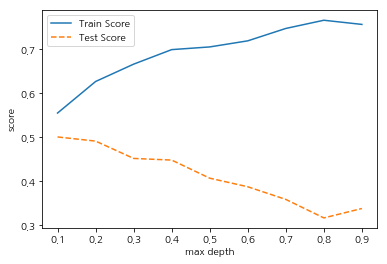

In [33]:
plt.plot(para_lr, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_lr, test_score, linestyle = '--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

In [34]:
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators = 20, min_samples_leaf=15, min_samples_split =88,
                                   max_depth =3, learning_rate =0.1)
gb_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(gb_final.score(df_train_x,df_train_y)))
print("score on test seg: {:.3f}".format(gb_final.score(df_test_x,df_test_y)))

Score on training set: 0.555
score on test seg: 0.500


In [35]:
gb_final

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=15,
             min_samples_split=88, min_weight_fraction_leaf=0.0,
             n_estimators=20, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [36]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
1,BMI,0.525
5,LTG,0.362
2,BP,0.076
4,LDL,0.016
3,CHOLESTEROL,0.012
0,GENDER,0.008


Text(0, 0.5, '변수')

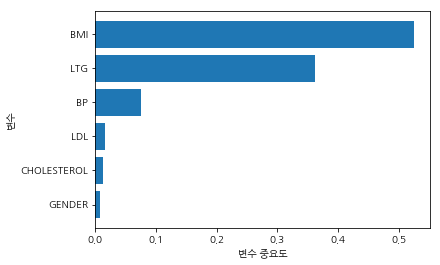

In [37]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [ ]:
estimator = GradientBoostingRegressor()

param_grid = {"criterion" : ["mse","friedman_mse", "mae"], "max_features":["auto", "sqrt", "log2"],
              "learning_rate":para_lr, "max_depth":para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_gb = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_gb.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_gb.best_estimator_))
print("\nbest parameter: \n{}".format(grid_gb.best_params_))
print("\nbest score:\n{}".format(grid_gb.best_score_.round(3)))